In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston


In [3]:
# Carregar o dataset
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target  # Adicionando a variável alvo (preço das casas)

# Exibir as primeiras linhas
df.head()


/Users/ralph/.pyenv/versions/3.9.19/envs/IA/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# TODO: Escolha uma variável para ser usada na regressão linear (ex: 'RM' - número médio de quartos por residência)
X = df[['RM']]  # Número médio de quartos
y = df['MEDV']  # Preço da casa

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibir estatísticas básicas
df[['RM', 'MEDV']].describe()


,RM,MEDV
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


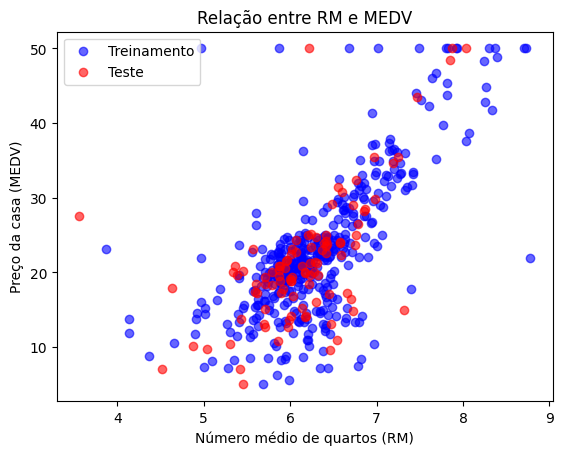

In [5]:
plt.scatter(X_train, y_train, label='Treinamento', color='blue', alpha=0.6)
plt.scatter(X_test, y_test, label='Teste', color='red', alpha=0.6)
plt.legend()
plt.xlabel("Número médio de quartos (RM)")
plt.ylabel("Preço da casa (MEDV)")
plt.title("Relação entre RM e MEDV")
plt.show()


In [6]:
# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtendo os coeficientes
m = modelo.coef_[0]
b = modelo.intercept_

print(f"Equação da reta estimada: MEDV = {m:.2f} * RM + {b:.2f}")


Equação da reta estimada: MEDV = 9.35 * RM + -36.25


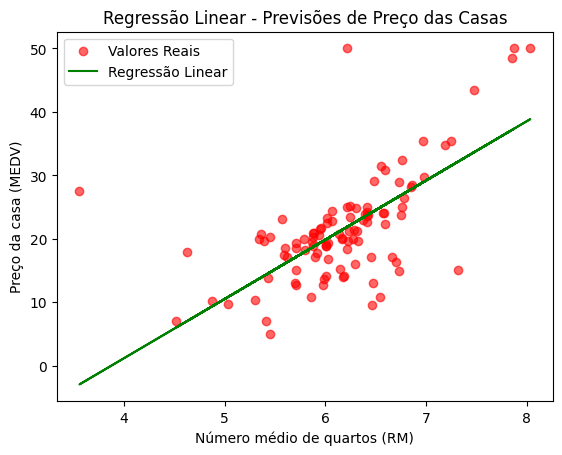

In [8]:
# Fazendo previsões
y_pred = modelo.predict(X_test)

# Visualizando os resultados
plt.scatter(X_test, y_test, label='Valores Reais', color='red', alpha=0.6)
plt.plot(X_test, y_pred, label='Regressão Linear', color='green')
plt.legend()
plt.xlabel("Número médio de quartos (RM)")
plt.ylabel("Preço da casa (MEDV)")
plt.title("Regressão Linear - Previsões de Preço das Casas")
plt.show()


## 📌 Reflexão Final 🧠
Agora que você treinou a regressão linear, responda:

1️⃣ O modelo conseguiu prever corretamente os preços das casas?
2️⃣ O coeficiente obtido faz sentido? Quanto um quarto a mais impacta no preço?
3️⃣ O que aconteceria se adicionássemos mais variáveis ao modelo?

💡 Experimente testar outras variáveis para melhorar a previsão! 🚀
